In [2]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
cols=["RowNumber","CustomerId","Surname"]
df.drop(columns=cols,inplace=True)
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


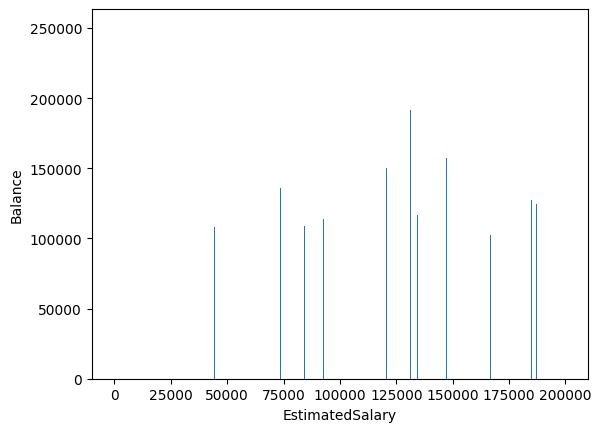

In [6]:
import matplotlib.pyplot as plt
x=df["EstimatedSalary"]
plt.xlabel("EstimatedSalary")
y=df["Balance"]
plt.ylabel("Balance")
plt.bar(x,y)
plt.show()

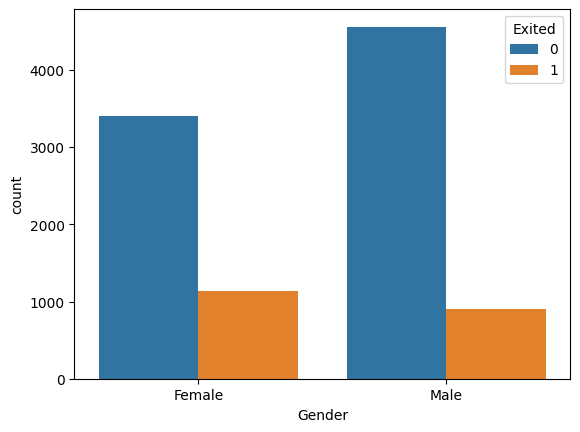

In [7]:
import seaborn as sns
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

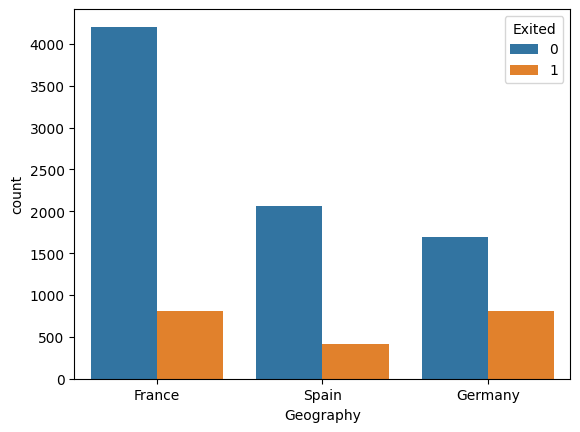

In [8]:
import seaborn as sns
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Geography"]=oe.fit_transform(df[["Geography"]])
df
#df.drop("Geoen",axis=1,inplace=True)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
oe=OrdinalEncoder()
df["Gender"]=oe.fit_transform(df[["Gender"]])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


In [13]:
xx=df.drop("Exited",axis=1)
yy=df["Exited"]

In [17]:
from sklearn.model_selection import train_test_split
Train_x,Test_x,Train_y,Test_y=train_test_split(xx,yy,random_state=40,test_size=0.5)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Train_x,Train_y)
pred_y=rf.predict(Test_x)
accuracy=accuracy_score(pred_y,Test_y)
print(accuracy)

0.8586


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
rf1=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
rf1.fit(Train_x,Train_y)
pred_y1=rf1.predict(Test_x)
accuracy1=accuracy_score(pred_y1,Test_y)
print(accuracy1)

0.8628
